In [ ]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, model_selection, metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/profvohra/DS-datasets/refs/heads/main/unknown-source/starsbytype.csv'
stars_df = pd.read_csv(url)
star_map = {0: 'red dwarf', 1: 'brown dwarf', 2: 'white dwarf', 3: 'main sequence', 4: 'super giant', 5: 'hyper giant'}
stars_df['class'] = stars_df['class'].map(star_map)

In [ ]:
stars_df.shape

(240, 5)

#1. The data set has 240 rows and 5 columns.

In [ ]:
stars_df

,temperature,brightness,size,color,class
0,3068,0.002400,0.1700,Red,red dwarf
1,3042,0.000500,0.1542,Red,red dwarf
2,2600,0.000300,0.1020,Red,red dwarf
3,2800,0.000200,0.1600,Red,red dwarf
4,1939,0.000138,0.1030,Red,red dwarf
...,...,...,...,...,...
235,38940,374830.000000,1356.0000,Blue,hyper giant
236,30839,834042.000000,1194.0000,Blue,hyper giant
237,8829,537493.000000,1423.0000,White,hyper giant
238,9235,404940.000000,1112.0000,White,hyper giant


In [ ]:
unique_colors = stars_df['color'].unique().tolist()

In [ ]:
unique_colors

['Red',
 'Blue White',
 'White',
 'Yellowish White',
 'Blue white',
 'Pale yellow orange',
 'Blue',
 'Blue-white',
 'Whitish',
 'yellow-white',
 'Orange',
 'White-Yellow',
 'white',
 'yellowish',
 'Yellowish',
 'Orange-Red',
 'Blue-White']

In [ ]:
features = stars_df.drop(columns=['class'])
label = stars_df['class']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state = 19)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(192, 4)
(48, 4)


There are 192 rows and 4 columns for the training set, and 48 rows and 4 columns for the test set.

*Drop Unencoded Class*

In [ ]:
X_train_drop = X_train.drop(columns=['color'])
X_test_drop = X_test.drop(columns=['color'])

In [ ]:
columns_to_encode = ['color']
columns_to_encode

['color']

*Ordinal Encoding*

In [ ]:
X_train_ord = X_train.copy()
X_test_ord = X_test.copy()
ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value = -1)
##There are some colors in X_train that are not in X_test and vice versa, and
##Couldn't find out the fix so I just defaulted the unknown to a default value.
##This will probably affect the model's performance later though.

X_train_ord[columns_to_encode] = ord_enc.fit_transform(X_train[columns_to_encode])
X_test_ord[columns_to_encode] = ord_enc.transform(X_test[columns_to_encode])
X_train_ord
X_test_ord

,temperature,brightness,size,color
138,3324,0.003400,0.34000,7.0
192,2994,0.007200,0.28000,7.0
181,2914,0.000631,0.11600,7.0
20,25000,0.056000,0.00840,1.0
129,2731,0.000437,0.08560,7.0
195,3598,0.002700,0.67000,7.0
237,8829,537493.000000,1423.00000,8.0
209,19360,0.001250,0.00998,0.0
228,23095,347820.000000,86.00000,0.0
60,3341,0.005600,0.05700,7.0


*One Hot Encoding*

In [ ]:
X_train_ohe = X_train_drop.copy()
X_test_ohe = X_test_drop.copy()
ohe_enc = OneHotEncoder(sparse_output = False, handle_unknown = 'ignore')
##Same thing as the last.
## Had to ignore unknown values.
ohe_enc.set_output(transform = 'pandas')
ohe_enc.fit(X_train[columns_to_encode])
ohe_columns = ohe_enc.get_feature_names_out()
ohe_columns

X_train_ohe[ohe_columns] = ohe_enc.transform(X_train[columns_to_encode])
X_test_ohe[ohe_columns] = ohe_enc.transform(X_test[columns_to_encode])
X_train_ohe

,temperature,brightness,size,color_Blue,color_Blue White,color_Blue white,color_Blue-white,color_Orange,color_Orange-Red,color_Pale yellow orange,color_Red,color_White,color_White-Yellow,color_Whitish,color_Yellowish,color_Yellowish White,color_white,color_yellow-white,color_yellowish
190,3462,0.0053,0.148,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,11250,672.0000,6.980,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,3614,145000.0000,1553.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,9700,74.0000,2.890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
155,28700,16790.0000,6.400,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,3441,0.0390,0.351,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,17383,342900.0000,30.000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,12098,689.0000,7.010,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,3459,100000.0000,1289.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Dummy Variable Encoding*

In [ ]:
X_train_dv = X_train_drop.copy()
X_test_dv = X_test_drop.copy()
dv_enc = OneHotEncoder(sparse_output = False, drop = 'first', handle_unknown = 'ignore')
##Same thing as the last.
## Had to ignore unknown values.
dv_enc.set_output(transform = 'pandas')
dv_enc.fit(X_train[columns_to_encode])
dv_columns = dv_enc.get_feature_names_out()

X_train_dv[dv_columns] = dv_enc.transform(X_train[columns_to_encode])
X_test_dv[dv_columns] = dv_enc.transform(X_test[columns_to_encode])
X_train_dv

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [0] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


,temperature,brightness,size,color_Blue White,color_Blue white,color_Blue-white,color_Orange,color_Orange-Red,color_Pale yellow orange,color_Red,color_White,color_White-Yellow,color_Whitish,color_Yellowish,color_Yellowish White,color_white,color_yellow-white,color_yellowish
190,3462,0.0053,0.148,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
95,11250,672.0000,6.980,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
175,3614,145000.0000,1553.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
33,9700,74.0000,2.890,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
155,28700,16790.0000,6.400,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19,3441,0.0390,0.351,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
168,17383,342900.0000,30.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
98,12098,689.0000,7.010,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
110,3459,100000.0000,1289.000,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Logistic Regression for each model.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.4791666666666667
Precision: 0.49324845679012347
Recall: 0.4791666666666667
F1: 0.4221436838624338


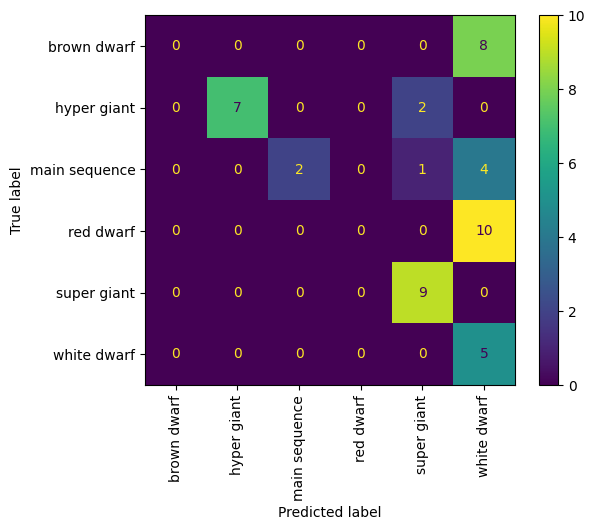

In [ ]:
model_drop = LogisticRegression()
model_drop.fit(X_train_drop, y_train)
pred_drop = model_drop.predict(X_test_drop)
print(f"Accuracy: {accuracy_score(y_test, pred_drop)}")
print(f"Precision: {precision_score(y_test, pred_drop, average = 'weighted')}")
print(f"Recall: {recall_score(y_test, pred_drop, average = 'weighted')}")
print(f"F1: {f1_score(y_test, pred_drop, average = 'weighted')}")

ConfusionMatrix = confusion_matrix(y_test, pred_drop, labels = model_drop.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix, display_labels = model_drop.classes_)
disp.plot()
x_ticks = plt.xticks(rotation = 90)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.4791666666666667
Precision: 0.49324845679012347
Recall: 0.4791666666666667
F1: 0.4221436838624338


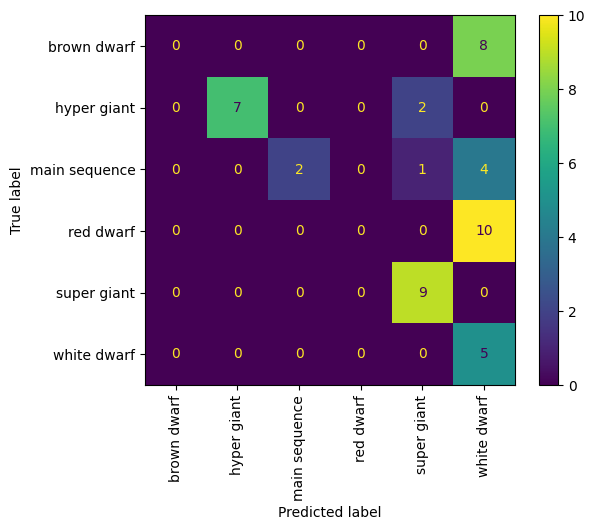

In [ ]:
model_ord = LogisticRegression()
model_ord.fit(X_train_ord, y_train)
pred_ord = model_ord.predict(X_test_ord)
print(f"Accuracy: {accuracy_score(y_test, pred_ord)}")
print(f"Precision: {precision_score(y_test, pred_ord, average = 'weighted')}")
print(f"Recall: {recall_score(y_test, pred_ord, average = 'weighted')}")
print(f"F1: {f1_score(y_test, pred_ord, average = 'weighted')}")

ConfusionMatrix = confusion_matrix(y_test, pred_ord, labels = model_drop.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix, display_labels = model_drop.classes_)
disp.plot()
x_ticks = plt.xticks(rotation = 90)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5
Precision: 0.4727623456790124
Recall: 0.5
F1: 0.4449875838493292


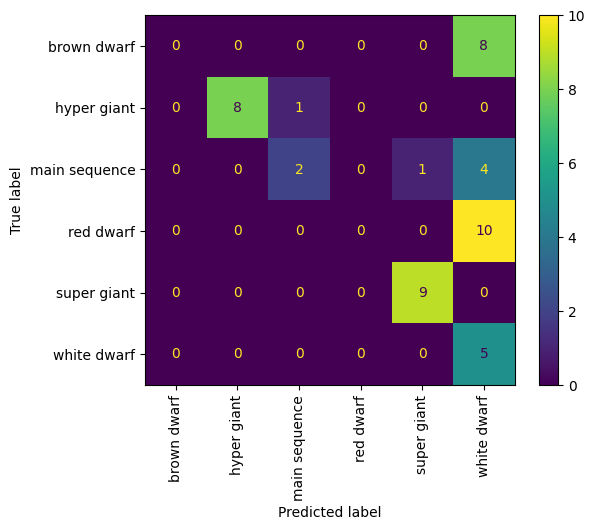

In [ ]:
model_ohe = LogisticRegression()
model_ohe.fit(X_train_ohe, y_train)
pred_ohe = model_ohe.predict(X_test_ohe)
print(f"Accuracy: {accuracy_score(y_test, pred_ohe)}")
print(f"Precision: {precision_score(y_test, pred_ohe, average = 'weighted')}")
print(f"Recall: {recall_score(y_test, pred_ohe, average = 'weighted')}")
print(f"F1: {f1_score(y_test, pred_ohe, average = 'weighted')}")

ConfusionMatrix = confusion_matrix(y_test, pred_ohe, labels = model_drop.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix, display_labels = model_drop.classes_)
disp.plot()
x_ticks = plt.xticks(rotation = 90)
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Accuracy: 0.5
Precision: 0.5060325476992144
Recall: 0.5
F1: 0.44258748638344225


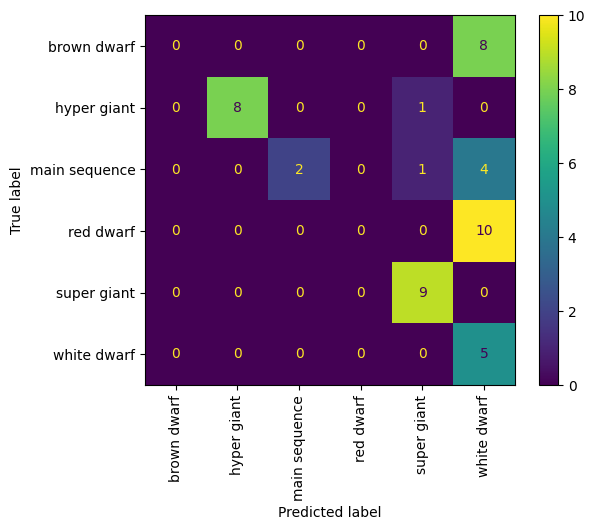

In [ ]:
model_dv = LogisticRegression()
model_dv.fit(X_train_dv, y_train)
pred_dv = model_dv.predict(X_test_dv)
print(f"Accuracy: {accuracy_score(y_test, pred_dv)}")
print(f"Precision: {precision_score(y_test, pred_dv, average = 'weighted')}")
print(f"Recall: {recall_score(y_test, pred_dv, average = 'weighted')}")
print(f"F1: {f1_score(y_test, pred_dv, average = 'weighted')}")

ConfusionMatrix = confusion_matrix(y_test, pred_dv, labels = model_dv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = ConfusionMatrix, display_labels = model_dv.classes_)
disp.plot()
x_ticks = plt.xticks(rotation = 90)
plt.show()


The highest performing model seems to be the dummy variable encoded model. It's overall Accuracy, Precision, Recall, and F1 score are the highest, whilst the worst performing model are equally the dropped column and ordinal encoded set.

Based on the accuracy, precision, f1 score, as well as looking at the confusion matrix for all the models, It seems as if white dwarf is being predicted commonly amongst all the other labels. This may be in part to the fix implemented while encoding and setting a default value to the unknown values to prevent the value errors.